# Deformable Convolutional Networks

2018년 4월 1일
<br>(드디어 한글이 됩니다 ㅎㅎ)

## 1. Introduction

A key challenge in visual recognition is how to accomodate geometric variations!

> First, dataset approach
- data augmentation

> **Second, features & algorithm approach**
- SIFT(Scale Invariant feature transform)
- sliding window

<br>
But, there are two drawbacks

> First, Only Known Transformation <br>
> Second, too dificult or too costly or infeasible :(

<br>
In this paper, two new modules are introduced!

> First, Deformable Convolution
- It adds 2D offsets to the regular grid sampling locations

> Second, Deformable RoI pooling
- It adds an offset to each bin position in the regular bin partition

## 2. Deformable Convolutional Networks

### 2.1 Deformable Convolution


Vanilla Conv (3x3 with dilation 1)
> $y(p_{0}) = \sum\limits_{p_{n}} w(p_{n}) \cdot x(p_{0}+p_{n})$

<br><br>
Deformable Conv 
>$y(p_{0}) = \sum\limits_{p_{n}} w(p_{n}) \cdot x(p_{0}+p_{n}+\Delta p_n)$
<br><br>
$x(p) = \sum\limits_q G(q,p) \cdot x(q)$
<br><br>
$G(q,p) = g(q_x,p_x) \cdot g(q_y,p_y)$
<br><br>
where $g(a,b) = max(0,1-|a-b|)$ ,$N=|R|$


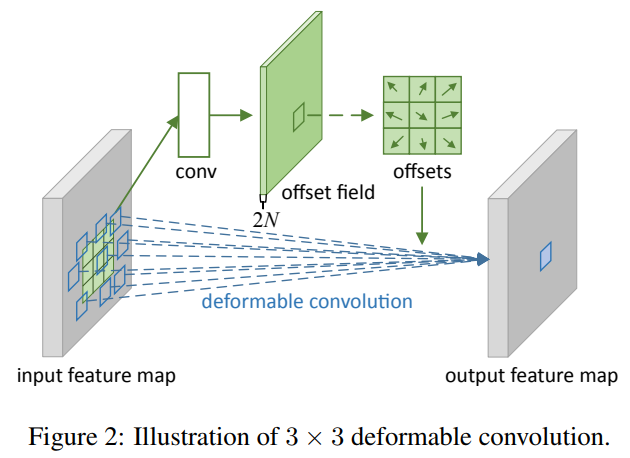


implementation
> 1. offsets are obtained by applying a conv layer over the same input feature map
2. the convolution kernel is of the **same spatial resolution and dilation**
3. the output offset fields have the **same spatial resolution with the input**
4. Channel dimension 2N corresponds to N x 2D offsets

### 2.2 Deformable RoI Pooling

<br> vanilla RoI Pooling is, <br><br>
$y(i,j)= \sum\limits_p x(p_0 + p) / n_{ij}$
<br> where $n_{ij}$ is the number of pixels in the bin <br>

>x: input feature map <br>
w x h: RoI size <br>
$p_0$ : top-left corner <br>
k x k: output size <br>
y(i, j): (i, j) th bin of the output feature map <br>

![Figure3](./Figure3.png)

<br>
$y(i,j)= \sum\limits_p x(p_0 + p + \Delta p_{ij}) / n_{ij}$
> Typically, $\Delta p_{ij}$ is fractional <br>
It is implemented by bilinear interpolation as well.

<br><br>
implementation
> 1. First, RoI pooling generates **the pooled** feature maps
2. a FC layer generates the *normalized* offsets $\Delta \hat{p_{ij}}$
    - normalization is necessary to make the offset learning invariant to RoI size
3. which are then transformed to the offsets $\Delta p_{ij}$ in Eq. (6)
    - $\Delta p_{ij} = \gamma \cdot \Delta \hat{p_{ij}} \odot (w,h)$ <br>(Element-wise product with the RoI's width and height)
    - $\gamma$ is a pre-defined value. empirically set to 0.1.

<br><br>
Position-Sensitive (PS) RoI Pooling <br>

![Figure4](./Figure4.png)

1. All the input feature maps are firstly converted to $k^2$ score maps for each object class
    - totally C+1 for C object classes
2. The output value for (i,j)th bin is obtained by summation from one score map $x_{i,j}$ corresponding to that bin
3. in the top branch, a conv layer generates the full spatial resolution offset fields
    - per ROI & per class, PS RoI pooling is applied on such fields to obtain normalized offsets

![PS_ROI](./PS_ROI.jpg)

### 2.3 Deformable ConvNets

![Figure5](./Figure5.png)

## 3. Understanding Deformable ConvNets

![Figure6](./Figure6.png)
![Figure7](./Figure7.png)